## Introduction
* We will be using New York City CitiBike data for this analysis. CitiBike is New York City's public bike sharing program which opened in May 2013. Bicycles are rented and then returned to various stations located throughout Manhattan, Brooklyn, and Queens. Memberships and various time-limited passes are available for purchase.
* Historical CitiBike useage data can be downloaded here.
* Python libraries should be used to answer all questions except the last one, where any tool(s) can be used. Your analysis should be performed and annotated so that it could easily be handed off to another data scientist in the group.

### Question 1
* Programmatically acquire, load, and prepare CitiBike data for the year 2016.
* How many data points are there in the data used for analysis?

In [1]:
import requests as req
import zipfile, io, os, shutil, json
 
import pandas as pd
import numpy as np
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
https://s3.amazonaws.com/tripdata/201601-citibike-tripdata
'2016{}-citibike-tripdata'

In [2]:
base_url = 'https://s3.amazonaws.com/tripdata/'
base_filename = '2016{}-citibike-tripdata'
filelist = []
 
# download the zipfiles and extract
sess = req.session()
 
for month in range(1,13):
    filename = base_filename.format(str(month).zfill(2))
   
    if not os.path.exists('./data/' + filename + '.csv'):
        the_url = base_url + filename + '.zip'
        download = sess.get(the_url)
        zipdata = zipfile.ZipFile(io.BytesIO(download.content))
        zipdata.extractall()
        shutil.move(filename + '.csv', './data/' + filename + '.csv')
   
    filelist.append('./data/' + filename + '.csv')

In [3]:
# load the data
data_list = []
for fil in filelist:
    data_list.append(pd.read_csv(fil))
   
data = pd.concat(data_list).reset_index(drop = True)
del data_list

In [4]:
data.shape

(13845655, 30)

### Question 2
* Plot the distribution of the trip duration.
* Describe the structure and hypotheses you have about that structure.
 

In [11]:
# Remove NA Values
sub_df1 = data[['bikeid', 'birth year', 'end station id', 'end station latitude',
               'end station longitude', 'end station name', 'gender', 'start station id',
               'start station latitude', 'start station longitude', 'start station name',
               'starttime', 'stoptime', 'tripduration', 'usertype']] 
sub_df1 = sub_df1.dropna(axis=0)

In [12]:
# Remove NA Values
sub_df2 = data[['Bike ID', 'Birth Year', 'End Station ID', 'End Station Latitude',
               'End Station Longitude', 'End Station Name', 'Gender', 'Start Station ID',
               'Start Station Latitude', 'Start Station Longitude', 'End Station Name',
               'Start Time', 'Stop Time', 'Trip Duration', 'User Type']] 
sub_df2 = sub_df2.dropna(axis=0)

In [13]:
sub_df2.columns = ['bikeid', 'birth year', 'end station id', 'end station latitude',
               'end station longitude', 'end station name', 'gender', 'start station id',
               'start station latitude', 'start station longitude', 'start station name',
               'starttime', 'stoptime', 'tripduration', 'usertype']

In [14]:
# Combine two sub-dataframes together
df0 = sub_df1.append(sub_df2)

In [15]:
df0.shape

(12222976, 15)

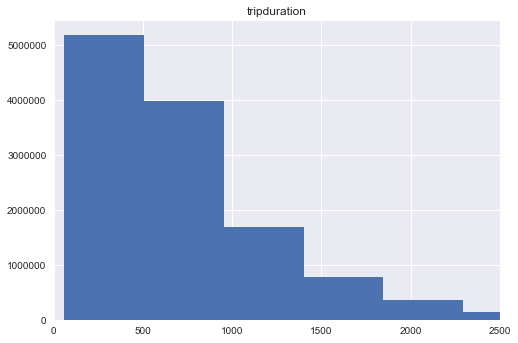

In [12]:
# import matplotlib
# matplotlib.style.use('ggplot')
# df0['tripduration'].plot.bar()
# df0['tripduration'][0:20].plot.bar()
df0.hist(column='tripduration', bins=20000)
plt.xlim([0.0, 2500.0])
plt.show()

### Question 3
* Make a plot of the total number of trips per hour of the day.
* What does this plot look like if days are broken into weekdays vs weekends? What does this usage pattern tell you?
* Find another interesting way to segment all or some of the data. Discuss your findings.
 

In [16]:
df0.head(n=1000)

,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,starttime,stoptime,tripduration,usertype
0,22285.0,1958.0,3002.0,40.711512,-74.015756,South End Ave & Liberty St,1.0,268.0,40.719105,-73.999733,Howard St & Centre St,1/1/2016 00:00:41,1/1/2016 00:16:04,923.0,Subscriber
1,17827.0,1969.0,498.0,40.748549,-73.988084,Broadway & W 32 St,1.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,1/1/2016 00:00:45,1/1/2016 00:07:04,379.0,Subscriber
2,21997.0,1982.0,284.0,40.739017,-74.002638,Greenwich Ave & 8 Ave,2.0,489.0,40.750664,-74.001768,10 Ave & W 28 St,1/1/2016 00:00:48,1/1/2016 00:10:37,589.0,Subscriber
3,22794.0,1961.0,3002.0,40.711512,-74.015756,South End Ave & Liberty St,2.0,268.0,40.719105,-73.999733,Howard St & Centre St,1/1/2016 00:01:06,1/1/2016 00:15:56,889.0,Subscriber
4,14562.0,1952.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,1.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,1/1/2016 00:01:12,1/1/2016 00:25:52,1480.0,Subscriber
5,15788.0,1984.0,389.0,40.710446,-73.965251,Broadway & Berry St,1.0,3104.0,40.720577,-73.961502,Kent Ave & N 7 St,1/1/2016 00:01:19,1/1/2016 00:06:51,332.0,Subscriber
6,24183.0,1963.0,3164.0,40.777057,-73.978985,Columbus Ave & W 72 St,1.0,3167.0,40.779668,-73.980930,Amsterdam Ave & W 73 St,1/1/2016 00:01:27,1/1/2016 00:40:08,2321.0,Subscriber
7,15747.0,1996.0,497.0,40.737050,-73.990093,E 17 St & Broadway,1.0,268.0,40.719105,-73.999733,Howard St & Centre St,1/1/2016 00:02:18,1/1/2016 00:13:53,694.0,Subscriber
8,23933.0,1963.0,259.0,40.701221,-74.012342,South St & Whitehall St,1.0,527.0,40.744023,-73.976056,E 33 St & 2 Ave,1/1/2016 00:03:12,1/1/2016 00:26:09,1376.0,Subscriber
9,23993.0,1971.0,311.0,40.717227,-73.988021,Norfolk St & Broome St,1.0,432.0,40.726218,-73.983799,E 7 St & Avenue A,1/1/2016 00:03:43,1/1/2016 00:13:59,615.0,Subscriber


In [17]:
from dateutil import parser
#df0 = df0.reset_index()
df0['starttime1'] = df0['starttime'].apply(lambda x: parser.parse(x))


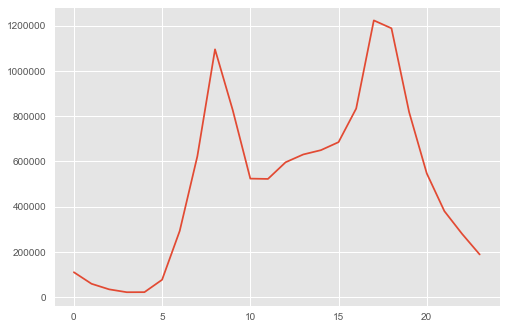

In [17]:
df0['hour'] = df0['starttime1'].apply(lambda x: x.hour)
### Group by Hour
gb_hour1 = df0.groupby(['hour']).agg({'bikeid':'count'}).reset_index() 
import matplotlib.pyplot as plt
plt.styll;;,.
`e.use('ggplot')
plt.plot( gb_hour1['bikeid'])
plt.show()

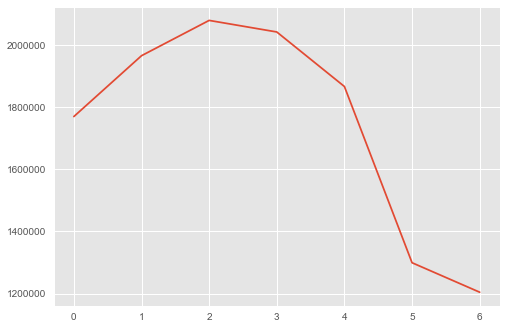

In [18]:
## Same with weekday
df0['weekday'] = df0['starttime1'].apply(lambda x: x.weekday())
### Group by Hour
gb_weekday1 = df0.groupby(['weekday']).agg({'bikeid':'count'}).reset_index() 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot( gb_weekday1['bikeid'])
plt.show()

### Question 4
*There are instances where a bike's next trip originates from a different station than it was returned to for its most recent previous trip. What do you think causes this?
*Explore this phenomenon.

In [18]:
bikeid_list  = list(df0['bikeid'].unique())
bikeid_df0  = df0[df0['bikeid'] == bikeid_list[1]][['start station id', 'end station id']]
## Moving times for one bikeid
(bikeid_df0)
bikeid_df0['diff_same'] = bikeid_df0['start station id'].shift(-1) - bikeid_df0['end station id']
bikeid_df0[bikeid_df0['diff_same'] != 0].shape[0]

247

In [19]:
## Count how many movings for each bike and get the moving ratio
bikeid_list  = list(df0['bikeid'].unique())
move_list = []
move_ratio_list = []
for i in range(len(bikeid_list)):
    bikeid_df0  = df0[df0['bikeid'] == bikeid_list[i]][['start station id', 'end station id']]
    bikeid_df0['diff_same'] = bikeid_df0['start station id'].shift(-1) - bikeid_df0['end station id']
    move_list.append(bikeid_df0[bikeid_df0['diff_same'] != 0].shape[0])
    move_ratio_list.append(bikeid_df0[bikeid_df0['diff_same'] != 0].shape[0]/bikeid_df0.shape[0])

In [20]:
bikeid_df1 = pd.DataFrame({'bikeid': bikeid_list,'count_move':move_list,
                          'move_ratio': move_ratio_list}, columns  = ['bikeid', 'count_move', 'move_ratio'])
bikeid_df1.head(n=20)

,bikeid,count_move,move_ratio
0,22285.0,272,0.168944
1,17827.0,247,0.204809
2,21997.0,329,0.130763
3,22794.0,5,0.087719
4,14562.0,303,0.247549
5,15788.0,243,0.221513
6,24183.0,252,0.383562
7,15747.0,240,0.240000
8,23933.0,254,0.260780
9,23993.0,208,0.205737


### Question 5
* Build a predictive model(s) for the total number of daily CitiBike trips. This model should include at least some features from an external data source, i.e. that is not included in the CitiBike data.
* Evaluate your model(s), discuss pros/cons, and alternative approaches.
 

In [21]:
weather = pd.read_csv('~/Documents/Citi Bike Data Analytics/data/citi_bike_weather.csv')
"""
weather features' explanations: 

WSF2 - Fastest 2-minute wind speed
WSF5 - Fastest 5-second wind speed
SNOW - Snowfall
WT04 - Ice pellets, sleet, snow pellets, or small hail" 
PRCP - Precipitation
WT06 - Glaze or rime 
WT08 - Smoke or haze 
SNWD - Snow depth
WDF2 - Direction of fastest 2-minute wind
AWND - Average wind speed
WDF5 - Direction of fastest 5-second wind
WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
TMAX - Maximum temperature
WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
TAVG - Average Temperature.
TMIN - Minimum temperature
"""

weather_df = weather[['DATE','PRCP','SNWD','TMIN', 'TMAX', 'AWND']]


In [22]:
weather_df.columns = ['date', 'precipitation', 'snow', 'min_temp', 'max_temp', 'wind_speed']

weather_df.head(n=5)

,date,precipitation,snow,min_temp,max_temp,wind_speed
0,20160101,0.0,0.0,34,42,7.6
1,20160102,0.0,0.0,32,40,6.7
2,20160103,0.0,0.0,35,45,7.8
3,20160104,0.0,0.0,14,36,8.5
4,20160105,0.0,0.0,11,29,5.1


In [23]:
avg_temp = (weather_df['min_temp'] + weather_df['max_temp'])/2
weather_df.is_copy = False
weather_df['avg_temp'] = avg_temp
weather_date =  weather_df['date'].apply(lambda x: pd.to_datetime(str(x)))
weather_df.is_copy = False
weather_df['date_py'] = weather_date
del weather_df['date']

In [24]:
### Merge citi bike table with weather table --- get q5_df
df0['date'] = df0['starttime1'].apply(lambda x: x.date())
df1 = df0[[ 'date', 'bikeid', 'start station id', 'end station id',  'starttime', 'stoptime']]
weather_df['date'] = weather_df['date_py'].apply(lambda x: x.date())
q5_df = pd.merge(df1, weather_df, on = 'date')

In [25]:
q5_df.head(n=100)


,date,bikeid,start station id,end station id,starttime,stoptime,precipitation,snow,min_temp,max_temp,wind_speed,avg_temp,date_py
0,2016-01-01,22285.0,268.0,3002.0,1/1/2016 00:00:41,1/1/2016 00:16:04,0.0,0.0,34,42,7.6,38.0,2016-01-01
1,2016-01-01,17827.0,476.0,498.0,1/1/2016 00:00:45,1/1/2016 00:07:04,0.0,0.0,34,42,7.6,38.0,2016-01-01
2,2016-01-01,21997.0,489.0,284.0,1/1/2016 00:00:48,1/1/2016 00:10:37,0.0,0.0,34,42,7.6,38.0,2016-01-01
3,2016-01-01,22794.0,268.0,3002.0,1/1/2016 00:01:06,1/1/2016 00:15:56,0.0,0.0,34,42,7.6,38.0,2016-01-01
4,2016-01-01,14562.0,2006.0,2006.0,1/1/2016 00:01:12,1/1/2016 00:25:52,0.0,0.0,34,42,7.6,38.0,2016-01-01
5,2016-01-01,15788.0,3104.0,389.0,1/1/2016 00:01:19,1/1/2016 00:06:51,0.0,0.0,34,42,7.6,38.0,2016-01-01
6,2016-01-01,24183.0,3167.0,3164.0,1/1/2016 00:01:27,1/1/2016 00:40:08,0.0,0.0,34,42,7.6,38.0,2016-01-01
7,2016-01-01,15747.0,268.0,497.0,1/1/2016 00:02:18,1/1/2016 00:13:53,0.0,0.0,34,42,7.6,38.0,2016-01-01
8,2016-01-01,23933.0,527.0,259.0,1/1/2016 00:03:12,1/1/2016 00:26:09,0.0,0.0,34,42,7.6,38.0,2016-01-01
9,2016-01-01,23993.0,432.0,311.0,1/1/2016 00:03:43,1/1/2016 00:13:59,0.0,0.0,34,42,7.6,38.0,2016-01-01


In [26]:
### Group by Temperature to count how many usage in total for each temp
gb_temp1 = q5_df.groupby(['avg_temp']).agg({'bikeid':'count'}).reset_index() 
### Group by Temperature to count how many days are under same temp
gb_temp2 = q5_df[['date', 'avg_temp']].drop_duplicates().groupby(['avg_temp']).agg({'date':'count'}).reset_index() 
q5_df2 = pd.merge(gb_temp1, gb_temp2, on = 'avg_temp')
### Calculate daily avg trips for every temp
q5_df2['daily_trips'] = q5_df2['bikeid']/q5_df2['date']

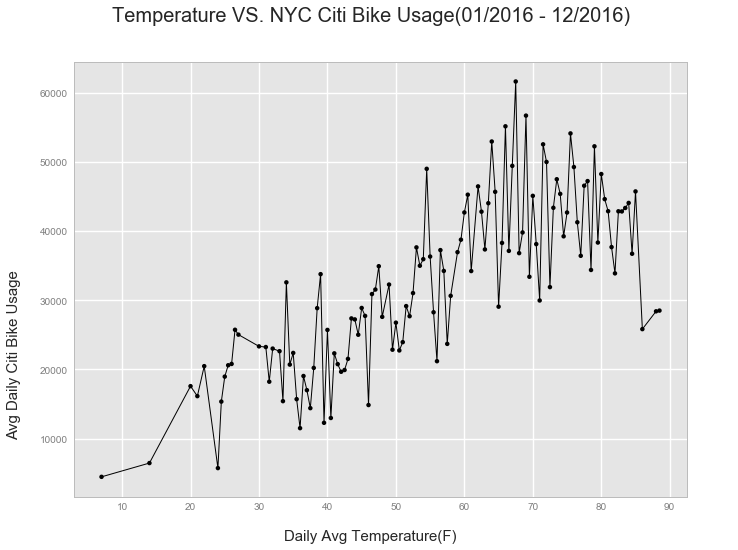

<ggplot: (-9223372036550955646)>

In [34]:
from ggplot import *
ggplot(q5_df2, aes('avg_temp', 'daily_trips'))  +\
ggtitle('Temperature VS. NYC Citi Bike Usage') +\
geom_point() + geom_line() +\
theme(plot_title = element_text(size = 20, text = 'Temperature VS. NYC Citi Bike Usage(01/2016 - 12/2016)')) +\
ylab(element_text(size = 15, text = 'Avg Daily Citi Bike Usage')) +\
xlab(element_text(size = 15, text = 'Daily Avg Temperature(F)'))

In [35]:
### Group by Temperature to count how many usage in total for each temp
gb_temp3 = q5_df.groupby(['snow']).agg({'bikeid':'count'}).reset_index() 
### Group by Temperature to count how many days are under same temp
gb_temp4 = q5_df[['date', 'snow']].drop_duplicates().groupby(['snow']).agg({'date':'count'}).reset_index() 
q5_df3 = pd.merge(gb_temp3, gb_temp4, on = 'snow')
### Calculate daily avg trips for every temp
q5_df3['daily_trips'] = q5_df3['bikeid']/q5_df3['date']


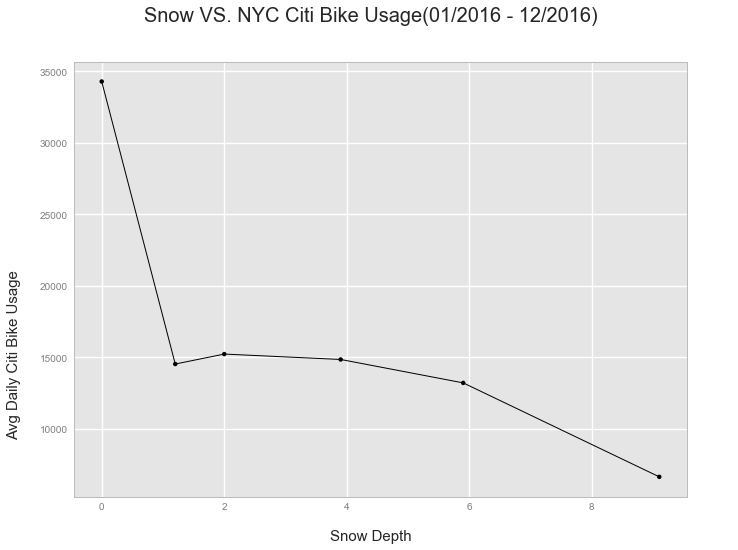

<ggplot: (-9223372036551032281)>

In [36]:
from ggplot import *
ggplot(q5_df3, aes('snow', 'daily_trips'))  +\
ggtitle('Snow VS. NYC Citi Bike Usage') +\
geom_point() + geom_line() +\
theme(plot_title = element_text(size = 20, text = 'Snow VS. NYC Citi Bike Usage(01/2016 - 12/2016)')) +\
ylab(element_text(size = 15, text = 'Avg Daily Citi Bike Usage')) +\
xlab(element_text(size = 15, text = 'Snow Depth'))

In [37]:
### Group by Temperature to count how many usage in total for each temp
gb_temp5 = q5_df.groupby(['precipitation']).agg({'bikeid':'count'}).reset_index() 
### Group by Temperature to count how many days are under same temp
gb_temp6 = q5_df[['date', 'precipitation']].drop_duplicates().groupby(['precipitation']).agg({'date':'count'}).reset_index() 
q5_df4 = pd.merge(gb_temp5, gb_temp6, on = 'precipitation')
### Calculate daily avg trips for every temp
q5_df4['daily_trips'] = q5_df4['bikeid']/q5_df4['date']

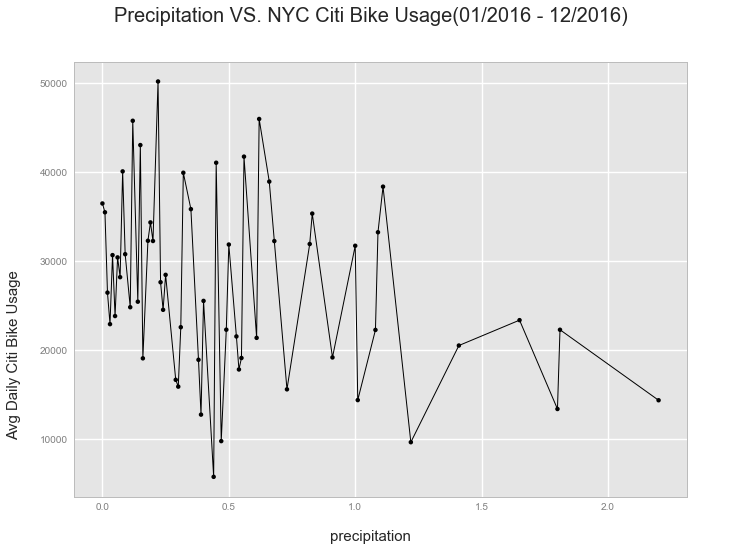

<ggplot: (-9223372036551191871)>

In [54]:
from ggplot import *
ggplot(q5_df4, aes('precipitation', 'daily_trips'))  +\
ggtitle('precipitation VS. NYC Citi Bike Usage') +\
geom_point() + geom_line() +\
theme(plot_title = element_text(size = 20, text = 'Precipitation VS. NYC Citi Bike Usage(01/2016 - 12/2016)')) +\
ylab(element_text(size = 15, text = 'Avg Daily Citi Bike Usage')) +\
xlab(element_text(size = 15, text = 'precipitation'))

### Question 6
* Predict daily traffic volumn based on Poisson Regression.
 

In [27]:
q6_df = q5_df.groupby(['avg_temp','snow', 'precipitation']).agg({'bikeid':'count'}).reset_index() 
q6_df = q6_df.rename(columns={'bikeid': 'daily_trips'})
q6_df.head(n=10)

,avg_temp,snow,precipitation,daily_trips
0,7.0,0.0,0.00,4461
1,14.0,0.0,0.00,6452
2,20.0,0.0,0.00,17571
3,21.0,0.0,0.00,16130
4,22.0,0.0,0.00,40931
5,24.0,0.0,0.44,5725
6,24.5,0.0,0.00,30680
7,25.0,0.0,0.00,18951
8,25.5,0.0,0.01,20594
9,26.0,0.0,0.00,20786


In [71]:
q6_df1 = q5_df.groupby(['date_py']).agg({'bikeid':'count'}).reset_index() 
#q6_df1 = q6_df1.rename(columns={'date_py': 'date'})
#q6_df1
q6_df2 = pd.merge(q6_df1, weather_df, on = 'date_py')
q6_df2 = q6_df2.rename(columns={'bikeid': 'daily_trips'})
q6_df2['daily_trips1']  = q6_df2['daily_trips']/1000
q6_df2.head(n=10)

,date_py,daily_trips,precipitation,snow,min_temp,max_temp,wind_speed,avg_temp,date,daily_trips1
0,2016-01-01,8508,0.0,0.0,34,42,7.6,38.0,2016-01-01,8.508
1,2016-01-02,12134,0.0,0.0,32,40,6.7,36.0,2016-01-02,12.134
2,2016-01-03,13368,0.0,0.0,35,45,7.8,40.0,2016-01-03,13.368
3,2016-01-04,18951,0.0,0.0,14,36,8.5,25.0,2016-01-04,18.951
4,2016-01-05,17571,0.0,0.0,11,29,5.1,20.0,2016-01-05,17.571
5,2016-01-06,23694,0.0,0.0,25,41,3.6,33.0,2016-01-06,23.694
6,2016-01-07,26868,0.0,0.0,31,46,2.5,38.5,2016-01-07,26.868
7,2016-01-08,27558,0.0,0.0,31,46,4.3,38.5,2016-01-08,27.558
8,2016-01-09,19159,0.0,0.0,40,47,8.1,43.5,2016-01-09,19.159
9,2016-01-10,13351,1.8,0.0,40,59,9.8,49.5,2016-01-10,13.351


In [29]:
import numpy as np
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [72]:
fam = Poisson()
ind = Independence()
model1 = GEE.from_formula("daily_trips1 ~ avg_temp + snow + precipitation", "date_py", data = q6_df2 , cov_struct=ind, family=fam)
result1 = model1.fit()
print(result1.summary())

                               GEE Regression Results                              
Dep. Variable:                daily_trips1   No. Observations:                  362
Model:                                 GEE   No. clusters:                      362
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   1
Family:                            Poisson   Mean cluster size:                 1.0
Dependence structure:         Independence   Num. iterations:                    50
Date:                     Wed, 05 Jul 2017   Scale:                           1.000
Covariance type:                    robust   Time:                         16:13:18
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6592      0.060     44.293      0.000       2.542       2.77

In [35]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [73]:

Xcol = ['precipitation', 'avg_temp', 'snow']
train, test = train_test_split(q6_df2, test_size=0.3, random_state=42)

Xtrain = train[Xcol]
Ytrain = train['daily_trips']
Xtest  = test[Xcol]
Ytest  = test['daily_trips']


In [74]:
# Poisson regression
# Note that offset/exposure is not needed because
# the length of time (per day) is the same in each case

# Either of these two methods work for formula and data

# method 1--log is explicitly taken of y-data
# poisson_train = pd.concat([np.log(Ytrain), Xtrain], axis=1)
# formula = 'trips~' + '+'.join(Xcol)

# method 2--log is in equation
poisson_train = pd.concat([Ytrain, Xtrain], axis=1)
formula = 'np.log(daily_trips)~' + '+'.join(Xcol)# + '-1' # fit is better with intercept present

# GLM model
model_PR1 = smf.glm(formula, 
                data=poisson_train, 
                family=sm.families.Poisson(link=sm.families.links.log))

# maximum likelihood model
model_PR2 = smf.poisson(formula, 
                        data=poisson_train)

results_PR1 = model_PR1.fit()
results_PR2 = model_PR2.fit()

Optimization terminated successfully.
         Current function value: 2.099900
         Iterations 13


In [77]:
# Generalized Linear Model Regression Results
results_PR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     np.log(daily_trips)   No. Observations:                  253
Model:                             GLM   Df Residuals:                      249
Model Family:                  Poisson   Df Model:                            3
Link Function:                     log   Scale:                             1.0
Method:                           IRLS   Log-Likelihood:                -531.27
Date:                 Wed, 05 Jul 2017   Deviance:                       2.9420
Time:                         16:13:42   Pearson chi2:                     2.91
No. Iterations:                      3                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2370      0.072     30.865      0.000       2.095       2.379
precipitation    -0.0478      0.066     -0.720      0.472      -0.178       0.082
avg_temp          0.0018      0.001      1.517      0.129      -0.001       0.004
snow             -0.0146      0.043     -0.342      0.733      -0.098       0.069
=================================================================================
"""

In [76]:
# Poisson Regression Results
results_PR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Poisson Regression Results                          
===============================================================================
Dep. Variable:     np.log(daily_trips)   No. Observations:                  253
Model:                         Poisson   Df Residuals:                      249
Method:                            MLE   Df Model:                            3
Date:                 Wed, 05 Jul 2017   Pseudo R-squ.:                0.002893
Time:                         16:13:38   Log-Likelihood:                -531.27
converged:                        True   LL-Null:                       -532.82
                                         LLR p-value:                    0.3791
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2370      0.072     30.865      0.000       2.095       2.379
precipitation    -0.0478      0.066     -0.720      0.472      -0.178       0.082
avg_temp          0.0018      0.001      1.517      0.129      -0.001       0.004
snow             -0.0146      0.043     -0.342      0.733      -0.098       0.069
=================================================================================
"""

In [78]:
# predict the counts for one of the two models above
Ypred_PR = results_PR1.predict(exog=Xtest)
Ypred_PR = np.exp(Ypred_PR)

In [79]:
# we will use this value later to compare models
results_PR1.pearson_chi2

2.9120487730137041

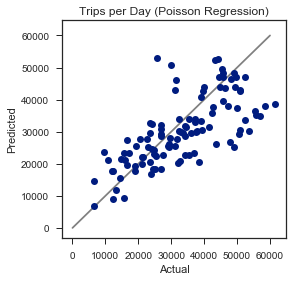

In [81]:
sns.set_palette('dark')
sns.set_context('notebook')
sns.set_style('ticks')

f = plt.figure(figsize=(4,4))
ax = plt.axes()

ax.plot(Ytest, Ypred_PR, marker='o', ls='')
ax.plot([0,60000],[0,60000], marker='', ls='-', 
        color='gray', zorder=-1)
xlim = ax.get_xlim()
ax.set_ylim(xlim)

_ = ax.set(xlabel='Actual', ylabel='Predicted', 
           title='Trips per Day (Poisson Regression)')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.show()

### Error analysis using $\chi^2$ and mean squared error

It is rather difficult to find a good error metric to compare Poisson distributions to the machine learning regression methods used below. Here, we have attempted to use mean squared error and a chi-squared test. Mean squared error is generally not used for Poisson regression, although in situations where the mean is very large, this is probably less of an issue.

In [82]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chisquare

In [83]:
results_list = list()

# add Poisson Regression data
chi2 = chisquare(Ytest, Ypred_PR, ddof=1)
results_list.append(pd.Series({'name':'Poisson Regression', 
                               'pred':Ypred_PR,
                               'mse': mean_squared_error(Ytest, Ypred_PR),
                               'chi2': chi2[0],
                               'p-value': chi2[1]}))

results_list[0]

chi2                                                  349922
mse                                              9.73402e+07
name                                      Poisson Regression
p-value                                                    0
pred       163    35774.088241
33     23267.108753
15    ...
dtype: object

### Regression with machine learning
* Regression with Random Forest, AdaBoost, and Gradient Boosted Trees.

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import chisquare

In [85]:
# setup grid searches for bagging and boosting models

param_grids = {'Random Forest': {'n_estimators':[100, 200, 300, 400], 
                      'max_depth':[2,3,4,5,6]},
               'AdaBoost': {'n_estimators':[50, 75, 100], 
                      'learning_rate':[0.001, 0.01, 0.1],
                      'base_estimator':[DecisionTreeRegressor(max_depth=2),
                                        DecisionTreeRegressor(max_depth=3),
                                        DecisionTreeRegressor(max_depth=4)]},
               'Gradient Boosting': {'n_estimators':[25, 50, 75, 100], 
                      'learning_rate':[0.001, 0.01, 0.1, 1.0],
                      'max_depth':[2,3,4,5,6]}}

regressors = {'Random Forest': RandomForestRegressor(n_jobs=-1, 
                                          random_state=42, 
                                          verbose=0, 
                                          oob_score=True),
              'AdaBoost': AdaBoostRegressor(random_state=42),
              'Gradient Boosting': GradientBoostingRegressor(random_state=42, 
                                              verbose=0)}

# fit models
results_list = []
for name in ['Random Forest', 'AdaBoost', 'Gradient Boosting']:
    method = regressors[name]
    grid = GridSearchCV(method, param_grids[name], n_jobs=-1,
                        scoring='neg_mean_squared_error')
    grid.fit(Xtrain, Ytrain)
    Ypred = grid.predict(Xtest)
    mse = mean_squared_error(Ytest, Ypred)
    chi2 = chisquare(Ytest, Ypred, ddof=1)
    
    df = pd.Series({'name':name, 'grid':grid, 'pred':Ypred, 
                    'mse':mse, 'chi2':chi2[0], 'p-value':chi2[1]})
    results_list.append(df)

# compile results
results = pd.concat(results_list, axis=1).T.set_index('name')

# mean squared errors
results[['mse', 'chi2', 'p-value']]

,mse,chi2,p-value
name,,,
Random Forest,7.45114e+07,295468,0
AdaBoost,7.92129e+07,313588,0
Gradient Boosting,7.38231e+07,281235,0


In [88]:
# dataframe for plotting
pred_df = pd.DataFrame(dict(zip(results.index, results.pred)))
pred_df['Poisson Regression'] = Ypred_PR
pred_df['Actual'] = Ytest.reset_index(drop=True)

# residuals
cols = ['Poisson Regression', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
resid_df = pred_df.copy()
resid_df[cols] = resid_df[cols].sub(resid_df.Actual, axis='rows')

pred_df.head(5)

,AdaBoost,Gradient Boosting,Random Forest,Poisson Regression,Actual
0,41796.218182,42160.565885,37568.666398,NaN,42460
1,22816.294118,25436.524650,23566.738759,NaN,15799
2,20842.578947,22838.374256,20039.532975,NaN,17122
3,22767.160714,25436.524650,23529.072720,17860.800178,35495
4,15058.714286,16270.564490,15278.002243,NaN,25414


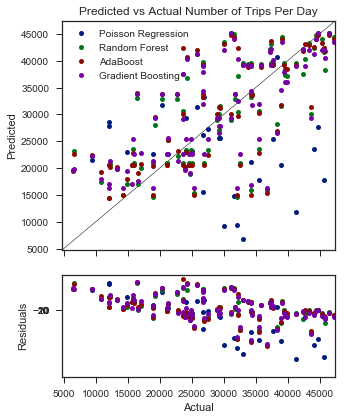

In [89]:
sns.set_palette('dark')
sns.set_context('notebook')
sns.set_style('ticks')

fig = plt.figure(figsize=(5,6))
ax1 = plt.subplot2grid((3, 1), (0,0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2,0))

# predicted vs actual plot
ax = ax1
_ = pred_df.plot('Actual', 
                 ['Poisson Regression', 'Random Forest', 'AdaBoost', 'Gradient Boosting'], 
                 marker='o', ms=5.0, ls='', ax=ax)

minval = min(ax.get_xlim()[0], ax.get_ylim()[0])
maxval = max(ax.get_xlim()[1], ax.get_ylim()[1])

ax.set_xlim(minval, maxval)
ax.set_ylim(minval, maxval)

ax.plot([minval, maxval], [minval, maxval], 
        marker='', ls='-', color='black', 
        zorder=-1, lw=0.5)

_ = ax.set(ylabel='Predicted', 
           title='Predicted vs Actual Number of Trips Per Day',
           xlabel='')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticklabels([])

# residual plot
ax = ax2
_ = resid_df.plot('Actual', 
                 ['Poisson Regression', 'Random Forest', 'AdaBoost', 'Gradient Boosting'], 
                 marker='o', ms=5.0, ls='', ax=ax, legend=False)

_ = ax.set_yticks([-20, -10, 0, 10, 20])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlim(minval, maxval)
ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()
#fig.savefig('figures/q5_model_predictions.png', dpi=300, transparent=True)